## This project is aimed to predict the Kic and CTOD of concretes

### The variables of the dataset are
* W(m): Depth of the beam
* S(m): Span length 
* B(m): Breadth of the beam
* E(GPa): Young Modulus
* f'c(MPa): Compressive strength
* a0(m): Notch depth
* ac(m): Final crack length
* ?c:  
* ?: 
* F(?c): 
* V(?c): 
* N(?c,?): 
* Pmax(N)Avg: Peak Load Average
* KsIC(MPa): stress intensity Factor
* CTODC(mm): Crack tip opening Displacement



In [149]:
#import libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle


In [150]:
%matplotlib inline

df= pd.read_csv("model data1.csv")

df.head(5)

,W(m),S(m),B(m),E(GPa),f'c(MPa),a0(m),ac(m),?c,?,F(?c),V(?c),"N(?c, ?)",Pmax (N)Avg,KsIC (MPa),CTODC(mm)
0,0.102,0.381,0.076,36.8,55.8,0.02958,0.056100,0.5500,0.527273,1.593713,3.596529,0.579137,2384.96,1.153320,0.021894
1,0.102,0.381,0.076,36.8,55.8,0.02958,0.056233,0.5513,0.526029,1.599034,3.615607,0.579857,2384.96,1.158538,0.022090
2,0.102,0.381,0.076,36.8,55.8,0.02958,0.056365,0.5526,0.524792,1.604395,3.634851,0.580572,2384.96,1.163792,0.022287
3,0.102,0.381,0.076,36.8,55.8,0.02958,0.056498,0.5539,0.523560,1.609798,3.654264,0.581283,2384.96,1.169084,0.022486
4,0.102,0.381,0.076,36.8,55.8,0.02958,0.056630,0.5552,0.522334,1.615241,3.673847,0.581990,2384.96,1.174413,0.022687


In [151]:
#remove variables not needed because some have missing values
column_to_drop = ['W(m)','S(m)', 'B(m)','?c','?','F(?c)','V(?c)', 'N(?c, ?)']

df.drop(column_to_drop , axis=1, inplace=True)

In [152]:
df.describe()

,E(GPa),f'c(MPa),a0(m),ac(m),Pmax (N)Avg,KsIC (MPa),CTODC(mm)
count,567.000000,567.000000,567.000000,567.000000,567.000000,567.000000,567.000000
mean,36.777998,62.811340,0.022733,0.048045,3784.436002,2.340661,0.061158
std,2.048603,14.449908,0.017540,0.019579,2567.213309,2.540357,0.090812
min,11.200000,55.800000,0.002056,0.002600,1140.000000,0.009020,0.000700
25%,36.800000,55.800000,0.002100,0.032402,2361.850000,1.090991,0.016916
50%,36.800000,55.800000,0.029580,0.057293,2384.960000,1.438882,0.030306
75%,36.800000,67.500000,0.032640,0.063260,3929.000000,1.959294,0.051095
max,45.200000,122.520000,0.060000,0.092250,19490.000000,13.984000,0.581000


### Explanatory Descriptive Analysis

In [153]:
df['final_crack']= (df['ac(m)']-df['a0(m)'])
df.drop(['a0(m)', 'ac(m)'], axis= 1, inplace= True)
df.head(5)

#outlier present removed
df = df[df['f\'c(MPa)'] != 77.9]
df = df[df['E(GPa)'] != 45.2]
df.head(10)


,E(GPa),f'c(MPa),Pmax (N)Avg,KsIC (MPa),CTODC(mm),final_crack
0,36.8,55.8,2384.96,1.153320,0.021894,0.026520
1,36.8,55.8,2384.96,1.158538,0.022090,0.026653
2,36.8,55.8,2384.96,1.163792,0.022287,0.026785
3,36.8,55.8,2384.96,1.169084,0.022486,0.026918
4,36.8,55.8,2384.96,1.174413,0.022687,0.027050
5,36.8,55.8,2384.96,1.179780,0.022890,0.027183
6,36.8,55.8,2384.96,1.185185,0.023095,0.027316
7,36.8,55.8,2384.96,1.190629,0.023302,0.027448
8,36.8,55.8,2384.96,1.196113,0.023511,0.027581
9,36.8,55.8,2384.96,1.201635,0.023722,0.027713


c:\Users\POPOOLA KAYODE\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



<AxesSubplot:xlabel='KsIC (MPa)', ylabel='Density'>

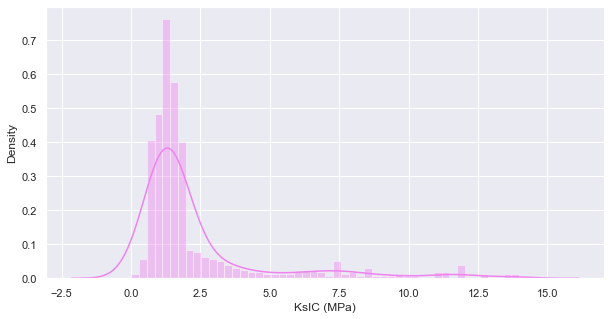

In [154]:
sns.set(font_scale=1.0)

fig, ax = plt.subplots(figsize=(10, 5))

sns.distplot(df['KsIC (MPa)'], color = 'violet')


c:\Users\POPOOLA KAYODE\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



<AxesSubplot:xlabel='CTODC(mm)', ylabel='Density'>

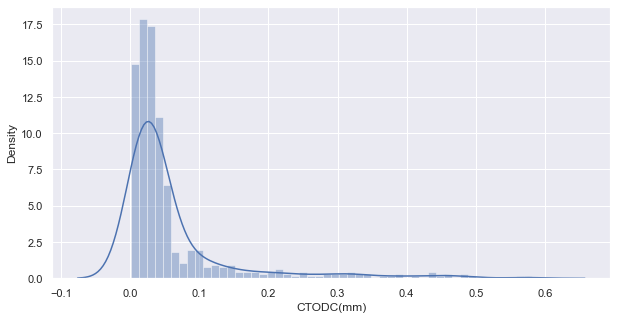

In [155]:
sns.set(font_scale=1.0)

fig, ax = plt.subplots(figsize=(10, 5))

sns.distplot(df['CTODC(mm)'])

c:\Users\POPOOLA KAYODE\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



<AxesSubplot:xlabel='final_crack', ylabel='Density'>

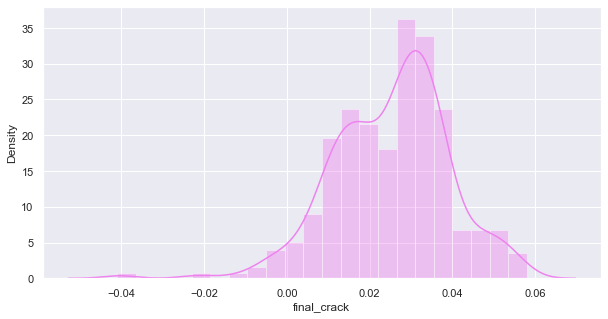

In [156]:
sns.set(font_scale=1.0)

fig = plt.subplots(figsize=(10, 5))

sns.distplot(df['final_crack'], color= 'violet')

In [157]:
# calculate aic for regression
# def calculate_aic(n, mse, num_params):
# 	aic = n * log(mse) + 2 * num_params
# 	return aic

# calculate bic for regression
# def calculate_bic(n, mse, num_params):
# 	bic = n * log(mse) + num_params * log(n)
# 	return bic

<AxesSubplot:xlabel='Pmax (N)Avg', ylabel='Count'>

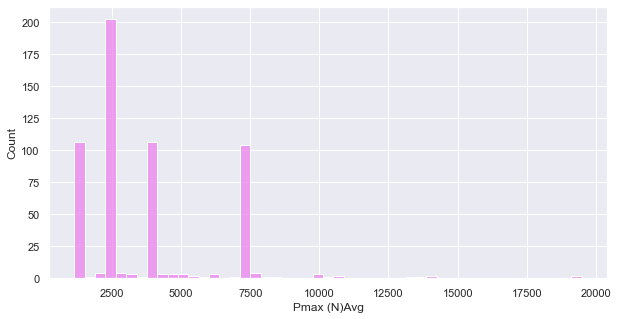

In [158]:
from turtle import color


sns.set(font_scale=1.0)

fig, ax = plt.subplots(figsize=(10, 5))

sns.histplot(df['Pmax (N)Avg'],color = 'violet')

<AxesSubplot:xlabel='E(GPa)', ylabel='Count'>

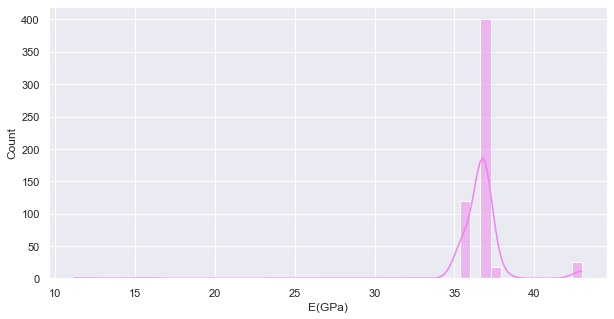

In [159]:
sns.set(font_scale=1.0)

fig, ax = plt.subplots(figsize=(10, 5))

sns.histplot(df['E(GPa)'], kde= True, cbar= True, bins= 50, color = 'violet')

<AxesSubplot:xlabel="f'c(MPa)", ylabel='Count'>

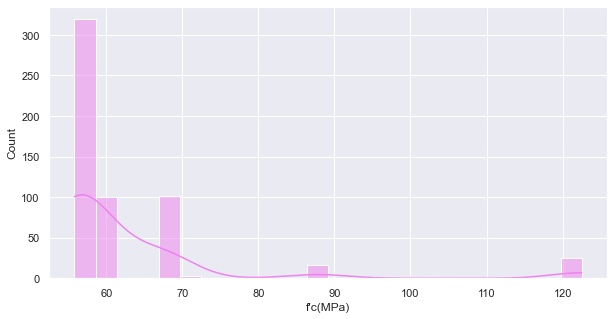

In [160]:

sns.set(font_scale=1.0)

fig, ax = plt.subplots(figsize=(10, 5))

sns.histplot(df['f\'c(MPa)'], kde= True,cbar=True, color = 'violet')

In [161]:
df_2 =df

In [162]:
df_2['CTODC(mm)'] =np.log10(df_2['CTODC(mm)'])
df_2['KsIC (MPa)']= np.log10(df_2['KsIC (MPa)'])

df_2.head(2)

,E(GPa),f'c(MPa),Pmax (N)Avg,KsIC (MPa),CTODC(mm),final_crack
0,36.8,55.8,2384.96,0.06195,-1.659675,0.026520
1,36.8,55.8,2384.96,0.06391,-1.655804,0.026653


c:\Users\POPOOLA KAYODE\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



<AxesSubplot:xlabel='CTODC(mm)', ylabel='Density'>

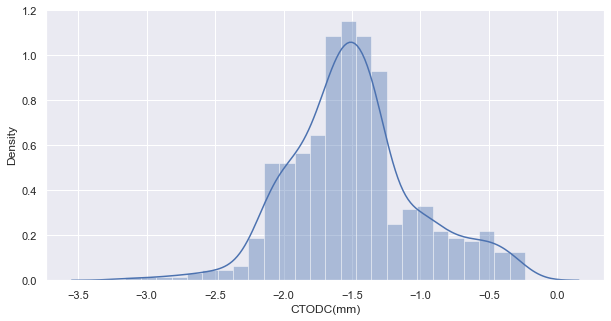

In [163]:
sns.set(font_scale=1.0)

fig, ax = plt.subplots(figsize=(10, 5))

sns.distplot(df_2['CTODC(mm)'])

c:\Users\POPOOLA KAYODE\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



<AxesSubplot:xlabel='KsIC (MPa)', ylabel='Density'>

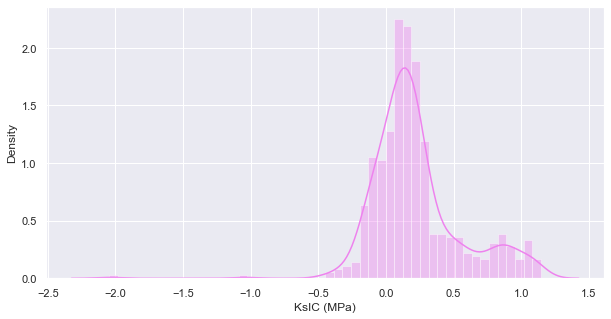

In [164]:
sns.set(font_scale=1.0)

fig, ax = plt.subplots(figsize=(10, 5))

sns.distplot(df_2['KsIC (MPa)'], color='violet')


In [165]:
df.head(2)

,E(GPa),f'c(MPa),Pmax (N)Avg,KsIC (MPa),CTODC(mm),final_crack
0,36.8,55.8,2384.96,0.06195,-1.659675,0.026520
1,36.8,55.8,2384.96,0.06391,-1.655804,0.026653


In [166]:
from plotly import __version__
import cufflinks as cf
from plotly.offline import download_plotlyjs,init_notebook_mode, plot,iplot

In [167]:
init_notebook_mode(connected=True)

In [168]:
cf.go_offline()

In [169]:
compare_value = pd.DataFrame(df[['KsIC (MPa)','CTODC(mm)']].groupby(by=df['f\'c(MPa)']).mean())
compare_value

,KsIC (MPa),CTODC(mm)
f'c(MPa),,
55.80,0.091940,-1.625380
57.14,-0.095518,-1.493867
60.60,0.469998,-1.241117
67.50,0.104294,-1.683070
68.20,0.203957,-0.999284
69.80,0.516395,-0.886832
71.20,0.292511,-0.723729
72.10,0.665560,-0.677543
87.71,0.853329,-0.733709


<AxesSubplot:xlabel="f'c(MPa)">

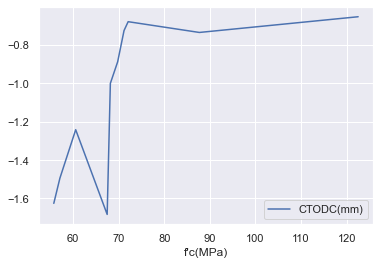

In [170]:
compare_value.drop('KsIC (MPa)', axis=1).plot()


<AxesSubplot:xlabel="f'c(MPa)">

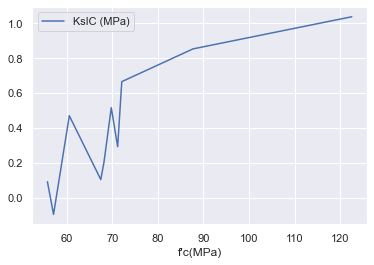

In [171]:
compare_value.drop('CTODC(mm)', axis=1).plot()


In [172]:
compare_value = pd.DataFrame(
    df[['KsIC (MPa)', 'CTODC(mm)']].groupby(by=df['Pmax (N)Avg']).mean())
compare_value.sort_index(ascending=False).head(15)
# we have 64 distinct peak loads

,KsIC (MPa),CTODC(mm)
Pmax (N)Avg,,
19490.0,1.145631,-0.235824
19310.0,1.139911,-0.249492
14230.0,1.131651,-0.316053
13980.0,1.132964,-0.309804
13510.0,1.079181,-0.521434
13370.0,1.079651,-0.513003
10850.0,1.077332,-0.409158
10620.0,1.075255,-0.416801
10300.0,1.045440,-0.764472


In [173]:
compare_value.head(10)

,KsIC (MPa),CTODC(mm)
Pmax (N)Avg,,
1140.000000,-1.038105,-2.091515
1260.000000,0.419606,-0.821847
1418.642134,-0.057056,-1.915797
1420.000000,-2.044793,-2.096910
1840.000000,0.034628,-1.749580
1980.000000,0.286085,-1.581253
2050.000000,0.799341,-1.292430
2361.850000,0.164324,-1.497783
2384.960000,0.168553,-1.462559


<AxesSubplot:xlabel='Pmax (N)Avg'>

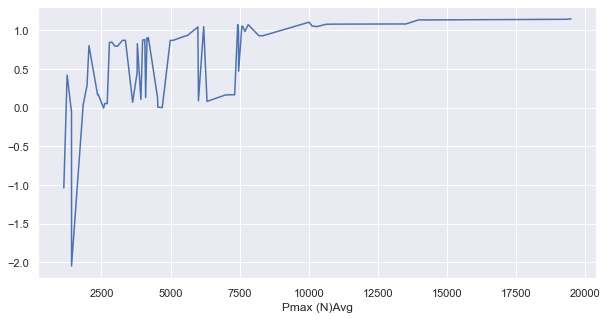

In [174]:

sns.set(font_scale=1.0)

fig, ax = plt.subplots(figsize=(10, 5))

compare_value['KsIC (MPa)'].plot()

<AxesSubplot:xlabel='Pmax (N)Avg'>

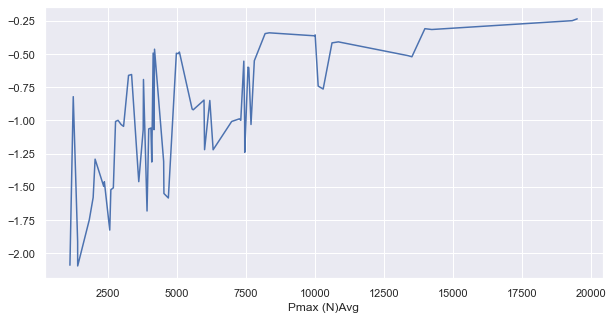

In [175]:

sns.set(font_scale=1.0)

fig, ax = plt.subplots(figsize=(10, 5))

compare_value['CTODC(mm)'].plot()


In [176]:
compare_value = pd.DataFrame(
    df[['KsIC (MPa)', 'CTODC(mm)']].groupby(by=df['E(GPa)']).mean())
compare_value.sort_index(ascending=False).head(15)

,KsIC (MPa),CTODC(mm)
E(GPa),,
42.987,1.037608,-0.651748
37.890,0.853329,-0.733709
36.800,0.186455,-1.529314
36.100,0.665560,-0.677543
35.780,-0.095518,-1.493867
35.500,0.108374,-1.675187
15.300,0.203957,-0.999284
11.200,0.292511,-0.723729


<AxesSubplot:xlabel='E(GPa)'>

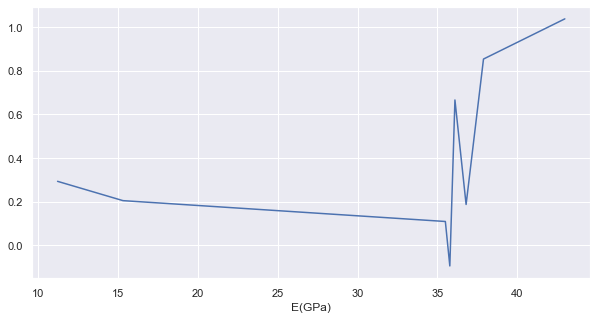

In [177]:
sns.set(font_scale=1.0)

fig, ax = plt.subplots(figsize=(10, 5))


compare_value['KsIC (MPa)'].plot()


<AxesSubplot:xlabel='E(GPa)'>

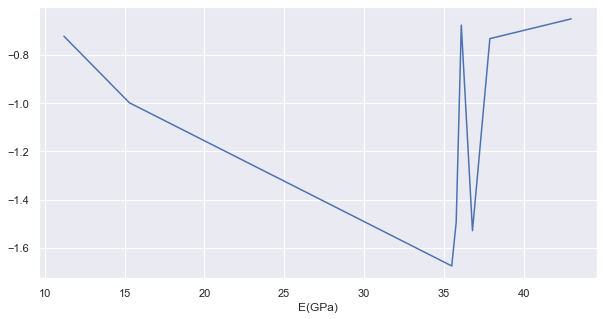

In [178]:
sns.set(font_scale=1.0)

fig, ax = plt.subplots(figsize=(10, 5))


compare_value['CTODC(mm)'].plot()


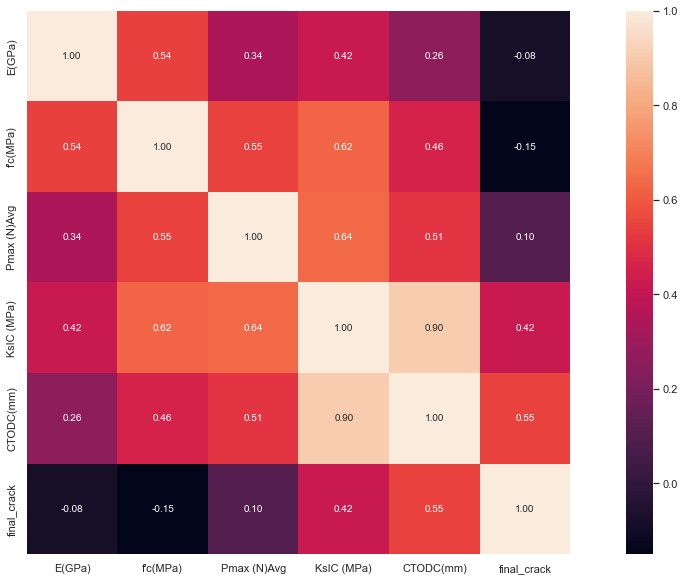

In [179]:
df_corr = df.corr()

sns.set(font_scale=1.0)

fig, ax = plt.subplots(figsize=(20, 10))

hm_movies = sns.heatmap(df_corr, cbar=True, annot=True, square=True, fmt=".2f", annot_kws={
                        "size": 10, }, yticklabels=df_corr.index, xticklabels=df_corr.index)


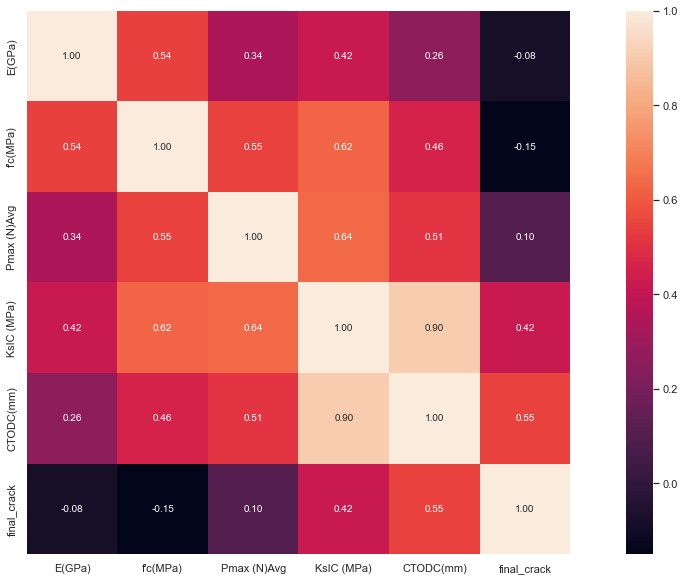

In [180]:
df_corr = df_2.corr()

sns.set(font_scale=1.0)

fig, ax = plt.subplots(figsize=(20, 10))

hm_movies = sns.heatmap(df_corr, cbar=True, annot=True, square=True, fmt=".2f", annot_kws={
                        "size": 10, }, yticklabels=df_corr.index, xticklabels=df_corr.index)


In [181]:
for col_name in ['KsIC (MPa)', 'CTODC(mm)']:
    col = df[col_name]
    rng = col.max() - col.min()
    var = col.var()
    std = col.std()
    print('\n{}:\n - Range: {:.2f}\n - Variance: {:.2f}\n - Std.Dev: {:.2f}'.format(col_name, rng, var, std))


KsIC (MPa):
 - Range: 3.19
 - Variance: 0.11
 - Std.Dev: 0.33

CTODC(mm):
 - Range: 2.92
 - Variance: 0.22
 - Std.Dev: 0.47


In [182]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler



In [210]:
cate = ['sample'] 

features_dict = {}

for feature in df_2.drop(['CTODC(mm)', 'KsIC (MPa)'],  axis="columns").columns:
    if feature in cate:
        features_dict[feature] = dict(enumerate(df[feature].cat.categories))
    else:
        features_dict[feature] = None
    
    
    


print(features_dict)

pickle.dump(features_dict, open('feature.pkl', 'wb'))



{'E(GPa)': None, "f'c(MPa)": None, 'Pmax (N)Avg': None, 'final_crack': None}


In [212]:
features_dict.keys()

dict_keys(['E(GPa)', "f'c(MPa)", 'Pmax (N)Avg', 'final_crack'])

In [184]:
# y = df_2[['CTODC(mm)', 'KsIC (MPa)']].values
# X = df_2.drop(['CTODC(mm)', 'KsIC (MPa)'], axis="columns")


In [185]:
y = df_2['CTODC(mm)'].values
X = df_2.drop(['CTODC(mm)', 'KsIC (MPa)'], axis="columns")


In [186]:
# Normalizing the data
X = StandardScaler().fit(X).transform(X)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=4)
print('Train set:', X_train.shape,  y_train.shape)
print('Test set:', X_test.shape,  y_test.shape)


Train set: (452, 4) (452,)
Test set: (113, 4) (113,)


In [187]:
Lr = LinearRegression()
Lr.fit(X_train,y_train)

LinearRegression()

In [188]:
from sklearn.metrics import r2_score, mean_squared_error
yhat = Lr.predict(X_test)
r2 = r2_score(y_test, yhat),
mse = mean_squared_error(y_test, yhat)

print('the R-squared: %.3f' % r2)
print('the mean square error: %.3f' % mse)



the R-squared: 0.544
the mean square error: 0.086


In [189]:
Lr.coef_

array([-0.0027216 ,  0.21302241,  0.08833123,  0.284267  ])

In [190]:
# coeff_df =pd.DataFrame(Lr.coef_.transpose())

coeff_df = pd.DataFrame(
    [Lr.coef_], index=['CTOD coefficient'],columns=features_dict.keys())
coeff_df['Intercept'] = Lr.intercept_
coeff_df

,E(GPa),f'c(MPa),Pmax (N)Avg,final_crack,Intercept
CTOD coefficient,-0.002722,0.213022,0.088331,0.284267,-1.492702


In [191]:
from math import log


def calculate_aic(n, mse, num_params):
	aic = n * log(mse) + 2 * num_params
	return aic


num_params = len(Lr.coef_) + 1
print('Number of parameters: %d' % (num_params))

aic = calculate_aic(len(y), mse, num_params)
print('AIC: %.3f' % aic)


Number of parameters: 5
AIC: -1377.822


c:\Users\POPOOLA KAYODE\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



<AxesSubplot:ylabel='Density'>

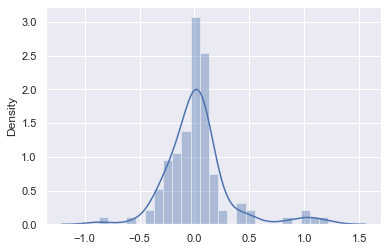

In [192]:
sns.distplot(y_test - yhat)


Text(0.5, 1.0, 'Predcition against Actual values')

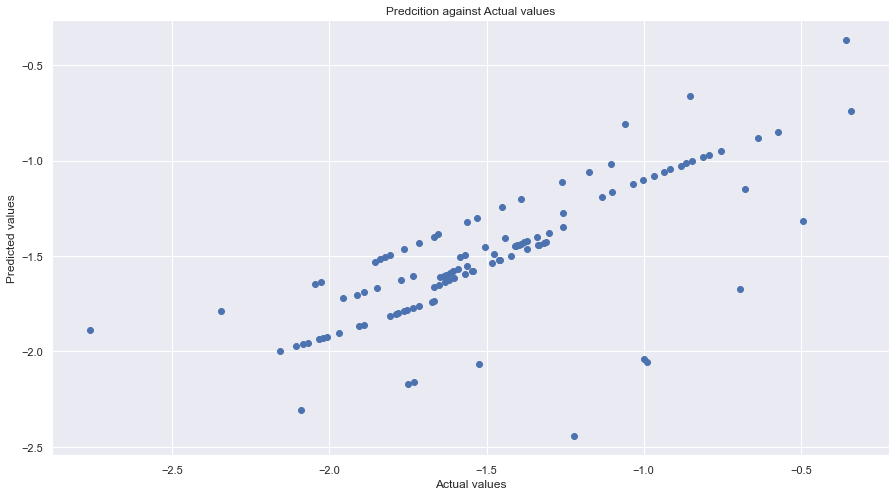

In [193]:

sns.set(font_scale=1.0)

fig, ax = plt.subplots(figsize=(15, 8))

plt.scatter(y_test,yhat)
plt.ylabel('Predicted values')
plt.xlabel('Actual values')
plt.title('Predcition against Actual values')


In [194]:
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.linear_model import Ridge


In [195]:
# rigde regression help to reduce overfiting and minimize our errors by adding a penalty terms
# min(sum of squared errors + alpha * slope^2)
# the model becomes less sensitive to the variation of the factors


rscore = []

for alpha in range(1000):
    ridge_reg = Ridge(alpha = alpha )
    ridge_reg.fit(X_train,y_train)
    yhat = ridge_reg.predict(X_test)
    rscore_=r2_score(y_test,yhat)
    rscore.append(rscore_)
rscore= np.array(rscore)



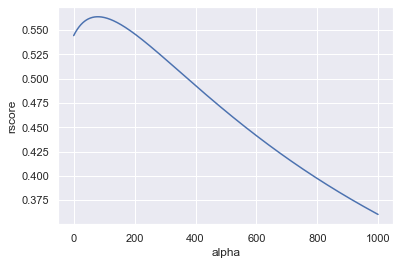

<Figure size 432x288 with 0 Axes>

In [196]:
plt.plot(rscore)
plt.xlabel('alpha')
plt.ylabel('rscore')
plt.show()
plt.clf()

In [197]:
ridge_reg = Ridge(alpha= rscore.argmax())
ridge_reg.fit(X_train,y_train)
yhat= ridge_reg.predict(X_test)
r2 = r2_score(y_test,yhat)
mse = mean_squared_error(y_test, yhat)

print('the R-squared: %.3f' % r2)
print('the mean square error: %.3f' % mse)


the R-squared: 0.564
the mean square error: 0.082


In [198]:
from math import log
def calculate_aic(n, mse, num_params):
	aic = n * log(mse) + 2 * num_params
	return aic


num_params = len(ridge_reg.coef_) + 1
print('Number of parameters: %d' % (num_params))

aic = calculate_aic(len(y), mse, num_params)
print('AIC: %.3f' % aic)


Number of parameters: 5
AIC: -1402.427


In [213]:
coeff_df = pd.DataFrame(
    [ridge_reg.coef_], index=['CTOD coefficient'], columns=features_dict.keys())
coeff_df['ridge_reg.intercept'] = ridge_reg.intercept_

coeff_df


,E(GPa),f'c(MPa),Pmax (N)Avg,final_crack,ridge_reg.intercept
CTOD coefficient,0.01202,0.164553,0.098975,0.235605,-1.491757


Text(0.5, 1.0, 'Predcition against Actual values')

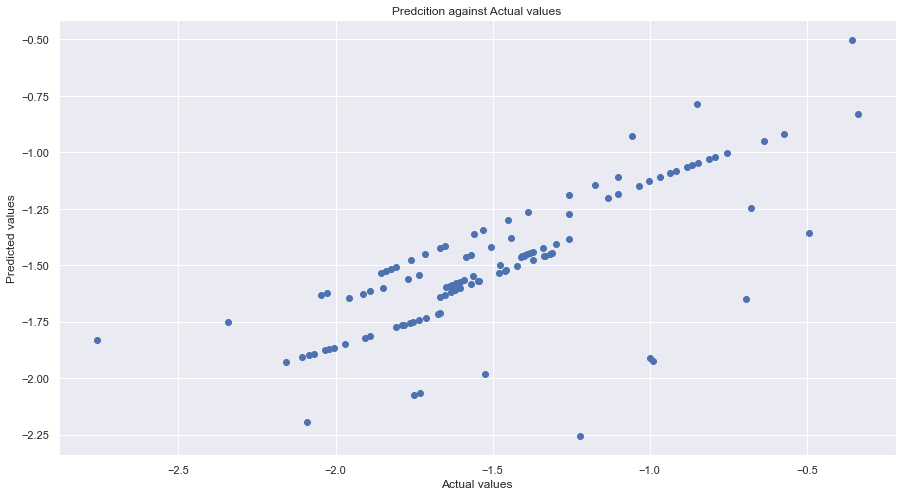

In [200]:

sns.set(font_scale=1.0)

fig, ax = plt.subplots(figsize=(15, 8))

plt.scatter(y_test, yhat)
plt.ylabel('Predicted values')
plt.xlabel('Actual values')
plt.title('Predcition against Actual values')


c:\Users\POPOOLA KAYODE\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



<AxesSubplot:ylabel='Density'>

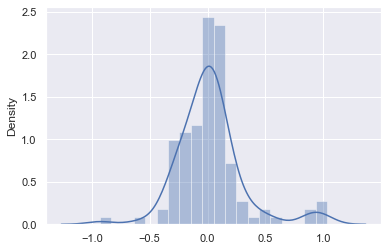

In [201]:
sns.distplot(y_test - yhat)


In [202]:
# lasso regression help to reduce overfiting and minimize our errors by adding a penalty terms
# min(sum of squared errors + alpha * |slope|)
# the model becomes less sensitive to the variation of the factors
# used for feature selection as the reduce useless variable to zero

from sklearn.linear_model import Lasso

rscore = []

for alpha in range(5000):
    lasso_reg = Ridge(alpha = alpha )
    lasso_reg.fit(X_train,y_train)
    yhat = lasso_reg.predict(X_test)
    rscore_=r2_score(y_test,yhat)
    rscore.append(rscore_)
rscore= np.array(rscore)

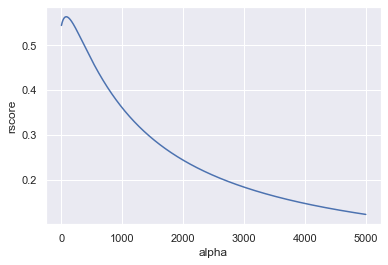

<Figure size 432x288 with 0 Axes>

In [203]:
plt.plot(rscore)
plt.xlabel('alpha')
plt.ylabel('rscore')
plt.show()
plt.clf()


In [204]:
lasso_reg = Ridge(alpha= rscore.argmax())
lasso_reg.fit(X_train,y_train)
yhat= lasso_reg.predict(X_test)
r2 = r2_score(y_test,yhat),
mse =mean_squared_error(y_test,yhat)
r2, mse


((0.5637664051166758,), 0.08209564641133196)

In [205]:
coeff_df = pd.DataFrame(
    [lasso_reg.coef_], index=['CTOD coefficient'], columns=features_dict.values())
coeff_df['lasso_reg.intercept'] = lasso_reg.intercept_

coeff_df


,E(GPa),f'c(MPa),Pmax (N)Avg,final_crack,lasso_reg.intercept
CTOD coefficient,0.01202,0.164553,0.098975,0.235605,-1.491757


Text(0.5, 1.0, 'Predcition against Actual values')

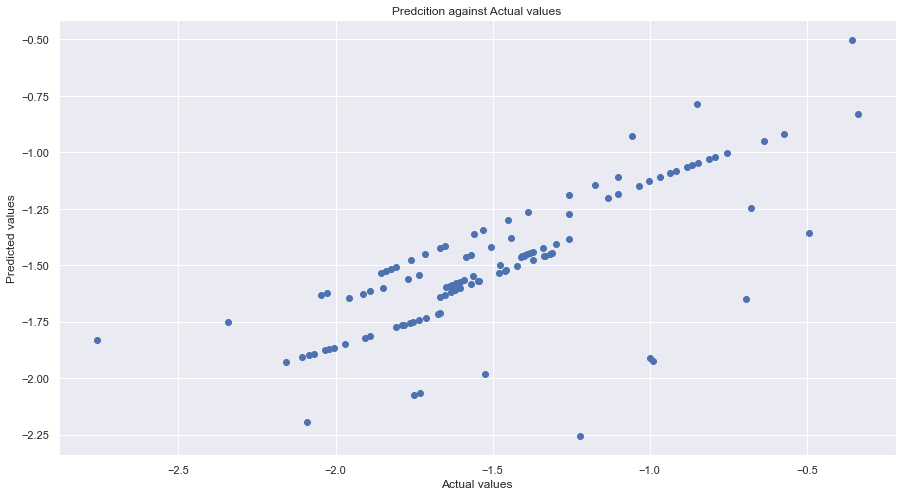

In [206]:

sns.set(font_scale=1.0)

fig, ax = plt.subplots(figsize=(15, 8))

plt.scatter(y_test, yhat)
plt.ylabel('Predicted values')
plt.xlabel('Actual values')
plt.title('Predcition against Actual values')


c:\Users\POPOOLA KAYODE\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



Text(0.5, 1.0, 'Distribution of variation')

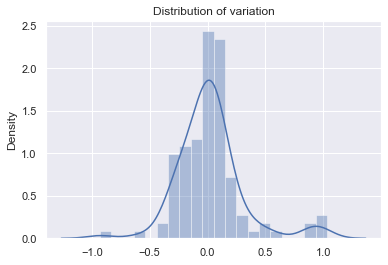

In [207]:
sns.distplot(y_test - yhat)
plt.title('Distribution of variation')

In [208]:
from math import log

# calculate aic for regression
def calculate_aic(n, mse, num_params):
	aic = n * log(mse) + 2 * num_params
	return aic

num_params = len(lasso_reg.coef_) + 1
print('Number of parameters: %d' % (num_params))

aic = calculate_aic(len(y), mse, num_params)
print('AIC: %.3f' % aic)
# calculate bic for regression
# def calculate_bic(n, mse, num_params):
# 	bic = n * log(mse) + num_params * log(n)
# 	return bic
.744
.025
2077

Number of parameters: 5
AIC: -1402.427


2077

In [209]:



filename = 'final_model.pkl'
pickle.dump(lasso_reg,open(filename, 'wb'))
